### Exercise 1

In [57]:
import pandas as pd

In [58]:
df_train=pd.read_csv('/content/drive/My Drive/Colab files/mnist_train.csv')
df_test=pd.read_csv('/content/drive/My Drive/Colab files/mnist_test.csv')

In [59]:
y_train=df_train['label']
x_train=df_train.drop('label',axis=1)

In [60]:
y_test=df_test['label']
x_test=df_test.drop('label',axis=1)

In [61]:
df_train.shape

(60000, 785)

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
clf = LogisticRegression(random_state=0).fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [64]:
predict=clf.predict(x_test)
predict

array([7, 2, 1, ..., 4, 5, 6])

In [65]:
clf.score(x_test, y_test)

0.9255

Dataset changed to small

In [66]:
df_train_small=df_train.iloc[:800,:]
df_test_small=df_train.iloc[800:1000,:]

y_train_small=df_train_small['label']
x_train_small=df_train_small.drop('label',axis=1)

y_test_small=df_test_small['label']
x_test_small=df_test_small.drop('label',axis=1)

In [67]:
from matplotlib import pyplot as plt
import numpy as np

Images Displayed

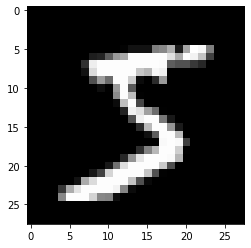

Label : 5


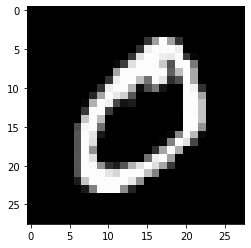

Label : 0


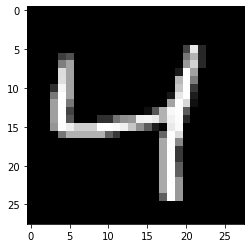

Label : 4


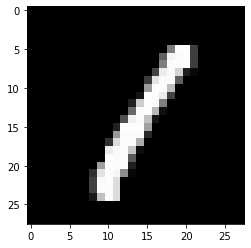

Label : 1


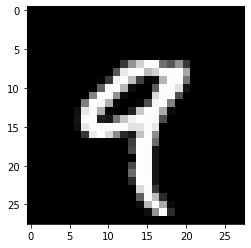

Label : 9


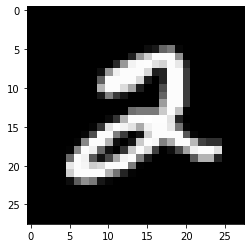

Label : 2


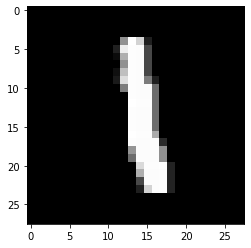

Label : 1


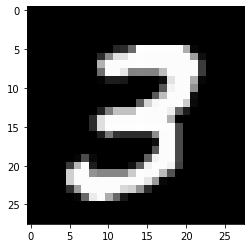

Label : 3


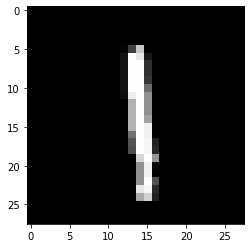

Label : 1


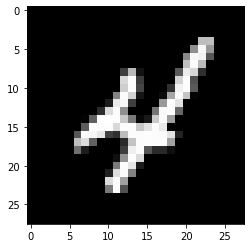

Label : 4


In [68]:
for i in range(10):
  pixels = np.array(x_train.iloc[i]).reshape((28, 28))
  plt.imshow(pixels, cmap='gray')
  plt.show()
  print("Label :", int(y_train.iloc[i]))

Tune model

In [69]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='none'), param_grid)
clf = clf.fit(x_train_small,y_train_small)
clf.score(x_test_small, y_test_small)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

0.82

Precision | Recall  |  F1 score

In [71]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [72]:
preci=precision_score(y_test, predict, average='macro')
recall=recall_score(y_test, predict, average='macro')
f1=f1_score(y_test, predict, average='macro')
print("precision : ",preci,"  |  recall : ",recall," |   f1 : ",f1)

precision :  0.9246626688478295   |  recall :  0.9244207693413402  |   f1 :  0.9244351911243222


Roc curve

In [78]:
import seaborn as sns

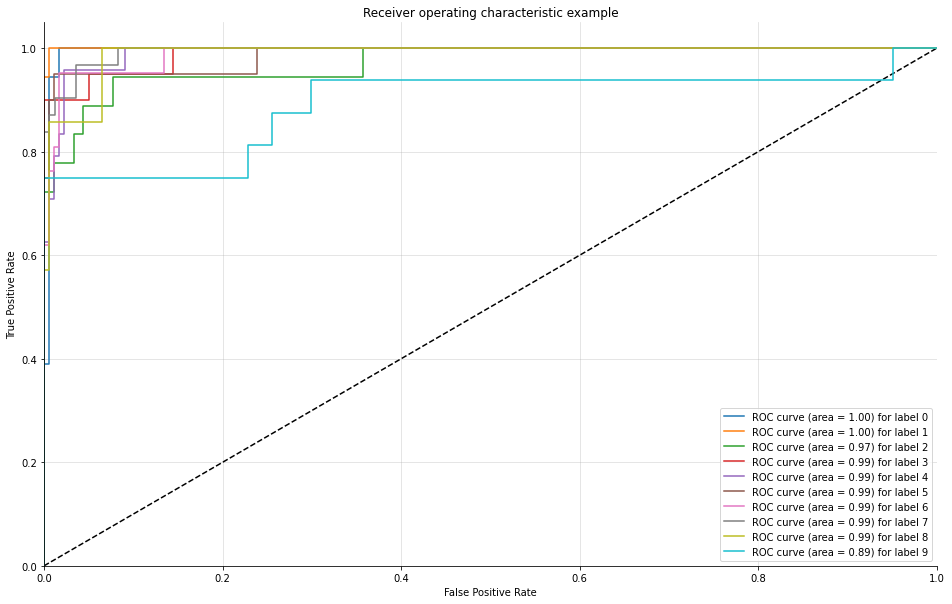

In [79]:

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i],_ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()


plot_multiclass_roc(clf, x_test_small, y_test_small , n_classes=10, figsize=(16, 10))

Misclassified images

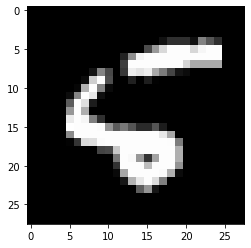

True Label : 5
Predicted Label : 6


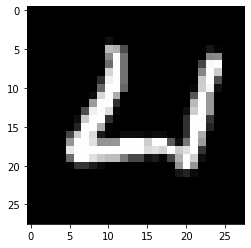

True Label : 4
Predicted Label : 6


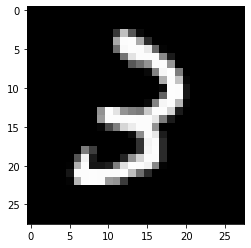

True Label : 3
Predicted Label : 2


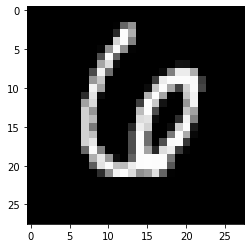

True Label : 6
Predicted Label : 3


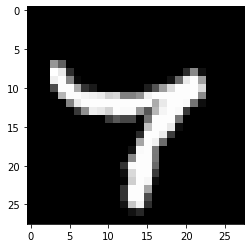

True Label : 7
Predicted Label : 4


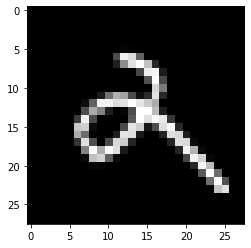

True Label : 2
Predicted Label : 9


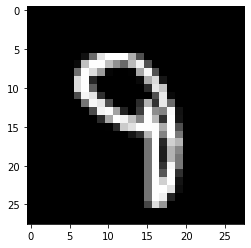

True Label : 9
Predicted Label : 3


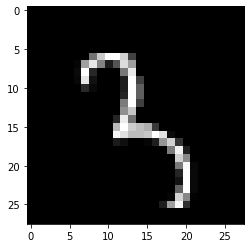

True Label : 3
Predicted Label : 8


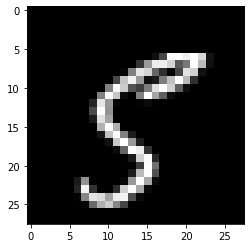

True Label : 5
Predicted Label : 7


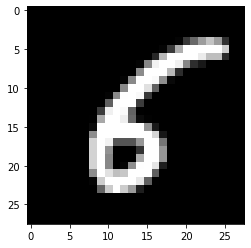

True Label : 6
Predicted Label : 5


In [76]:
count=0
for i in range(len(x_test)):
  new_y_test = np.array(y_test)
  if(predict[i] != new_y_test[i]):
    pixels = np.array(x_test.iloc[i]).reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    print("True Label :", int(y_test.iloc[i]))
    print("Predicted Label :", predict[i])
    count+=1
  if count==10:
    break


### Exercise 2

SVM

In [77]:
clf = svm.SVC()
clf.fit(x_train_small, y_train_small) 

svm_pred = clf.predict(x_test_small)  

svm_train_acc = clf.score(x_train_small, y_train_small)
print("svm training accuracy:", svm_train_acc)


svm_test_acc = clf.score(x_test_small, y_test_small)
print("svm testing accuracy:",svm_test_acc)

svm training accuracy: 0.985
svm testing accuracy: 0.89
